In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("Orders.xlsx")

print(df.head())
print(df.info())


  Client ID                         Client Name  \
0   C000001             Annamalaiyar Industries   
1   C000002               Bhima Jewellery Theni   
2   C000003            Sree Sumangali Jewellery   
3   C000004             Sri Aishwarya Jewellery   
4   C000005  Gomathi Sankar Textiles & Garments   

                        Industry Client Type    Location  
0  Business Supplies & Equipment    Business  Coimbatore  
1  Business Supplies & Equipment    Business       Theni  
2  Business Supplies & Equipment    Business     Madurai  
3  Business Supplies & Equipment    Business     Madurai  
4  Business Supplies & Equipment    Business  Coimbatore  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Client ID    32 non-null     object
 1   Client Name  32 non-null     object
 2   Industry     8 non-null      object
 3   Client Type  32 non-null   

In [ ]:
df = pd.read_excel("Orders.xlsx", sheet_name='Cleaned Orders')
display(df.head())

,Order ID,Client ID,Client name,Location,Client Type,Bag Colour,Bag Size,Bag Type,Printing Colour,No of Bags,Order Date,Order Month,Order Year,Order Fulfillment Date,Status,Occasion,Month
0,ORD000001,C000002,Bhima Jewellery Theni,Theni,Business,White,16*19 Inch,Non Non Woven,Double Colour,5000,2023-01-10,January,2023,2023-01-16,Completed,Regular,1
1,ORD000002,C000004,Sri Aishwarya Jewellery,Madurai,Business,Golden,16*19 Inch,Non Woven,Triple Colour,4000,2024-06-23,June,2024,2024-06-27,Completed,Regular,6
2,ORD000003,C000008,Abhinaya Jewellers,Madurai,Business,Golden,16*19 Inch,Non Woven,Triple Colour,3000,2022-10-31,October,2022,2022-11-09,Delayed,Regular,10
3,ORD000004,C000005,Gomathi Sankar Textiles & Garments,Coimbatore,Business,Yellow,16*19 Inch,Non Woven,Double Colour,1000,2023-09-04,September,2023,2023-09-05,Completed,Regular,9
4,ORD000005,C000001,Annamalaiyar Industries,Coimbatore,Business,Yellow,11.5*13.5 Inch,Non Non Woven,Single Colour,5000,2024-05-18,May,2024,2024-05-24,Completed,Regular,5


In [ ]:
df.columns

Index(['Order ID', 'Client ID', 'Client name ', 'Location', 'Client Type',
       'Bag Colour', 'Bag Size', 'Bag Type', 'Printing Colour', 'No of Bags',
       'Order Date', 'Order Month', 'Order Year', 'Order Fulfillment Date',
       'Status', 'Occasion', 'Month'],
      dtype='object')

In [ ]:
total_orders = df.shape[0]
date_range = (df['Order Date'].min(), df['Order Date'].max())

print("Total Orders:", total_orders)
print("Date Range:", date_range)


Total Orders: 500
Date Range: (Timestamp('2022-03-07 00:00:00'), Timestamp('2025-03-03 00:00:00'))


In [ ]:

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')

monthly_orders = df.groupby('Month')['Order ID'].count()
monthly_orders.describe()


,Order ID
count,37.00
mean,13.51
std,3.78
min,2.00
25%,11.00
50%,14.00
75%,16.00
max,20.00


In [ ]:
avg_bags = df['No of Bags'].mean()
max_bags = df['No of Bags'].max()
min_bags = df['No of Bags'].min()

print("Avg Bags:", avg_bags)
print("Max Bags:", max_bags)
print("Min Bags:", min_bags)

Avg Bags: 3036.0
Max Bags: 5000
Min Bags: 1000


In [ ]:
client_split = df['Client Type'].value_counts(normalize=True) * 100
print(client_split)


Client Type
Business     50.00
Individual   50.00
Name: proportion, dtype: float64


In [ ]:
client_split = df['Client Type'].value_counts(normalize=True) * 100
print(client_split)

Client Type
Business     50.00
Individual   50.00
Name: proportion, dtype: float64


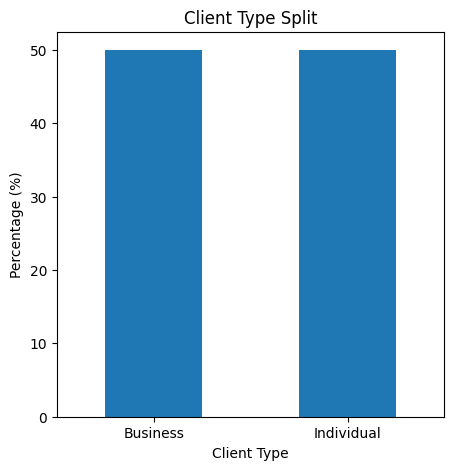

In [ ]:
plt.figure(figsize=(5, 5))
client_split.plot(kind='bar')
plt.title('Client Type Split')
plt.xlabel('Client Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:
df.columns

Index(['Order ID', 'Client ID', 'Client name ', 'Location', 'Client Type',
       'Bag Colour', 'Bag Size', 'Bag Type', 'Printing Colour', 'No of Bags',
       'Order Date', 'Order Month', 'Order Year', 'Order Fulfillment Date',
       'Status', 'Occasion', 'Month'],
      dtype='object')

In [ ]:
top_clients = df.groupby('Client name ')['No of Bags'].sum().sort_values(ascending=False).head(5)
top_clients_pct = (top_clients.sum() / df['No of Bags'].sum()) * 100

print(top_clients)
print("Top 5 contribution:", top_clients_pct, "%")

Client name 
Annamalaiyar Industries               134000
Poongulazhi Jewellers                 124000
Bhima Jewellery Theni                 107000
Abhinaya Jewellers                    100000
Gomathi Sankar Textiles & Garments     90000
Name: No of Bags, dtype: int64
Top 5 contribution: 36.56126482213439 %


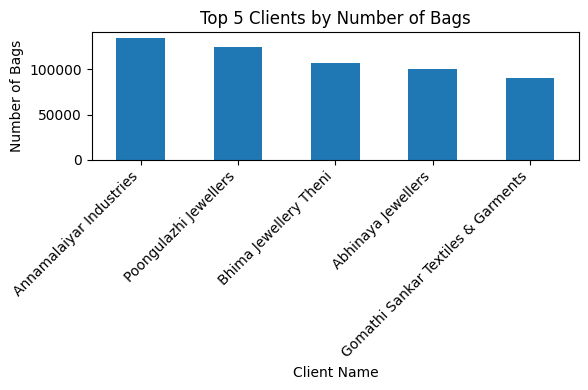

In [ ]:
plt.figure(figsize=(6, 4))
top_clients.plot(kind='bar')
plt.title('Top 5 Clients by Number of Bags')
plt.xlabel('Client Name')
plt.ylabel('Number of Bags')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

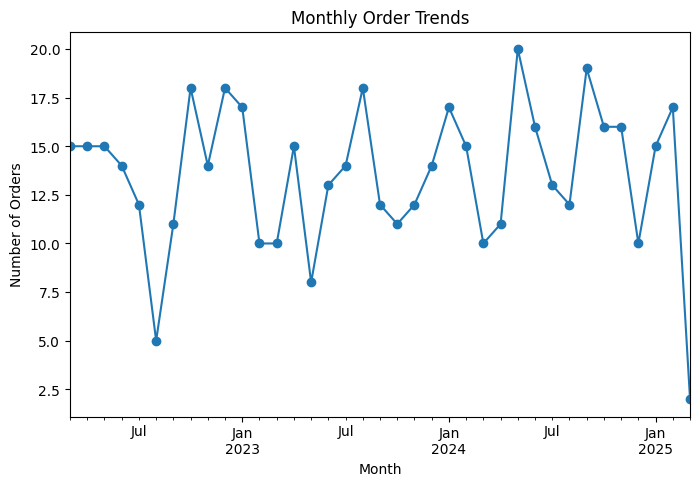

In [ ]:
import matplotlib.pyplot as plt

monthly_orders = df.groupby(df['Order Date'].dt.to_period('M'))['Order ID'].count()

monthly_orders.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Monthly Order Trends")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()


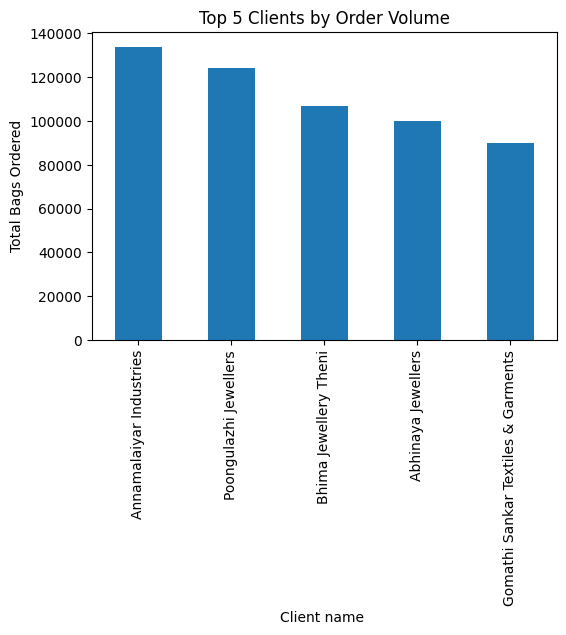

In [ ]:
top_clients = df.groupby('Client name ')['No of Bags'].sum().nlargest(5)
top_clients.plot(kind='bar', figsize=(6,4))
plt.title("Top 5 Clients by Order Volume")
plt.ylabel("Total Bags Ordered")
plt.show()

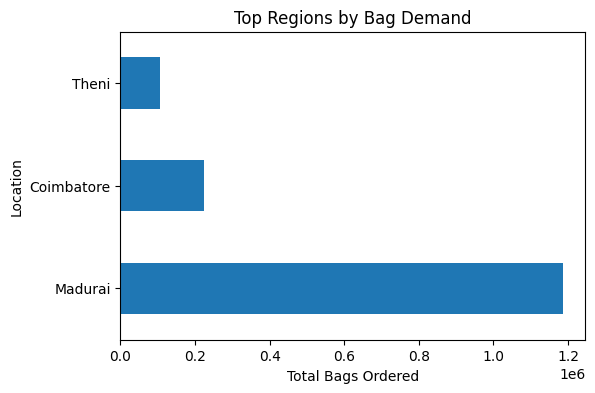

In [ ]:
regional_demand = df.groupby('Location')['No of Bags'].sum().sort_values(ascending=False)
regional_demand.head(10).plot(kind='barh', figsize=(6,4))
plt.title("Top Regions by Bag Demand")
plt.xlabel("Total Bags Ordered")
plt.show()


In [ ]:
from scipy.stats import skew

In [ ]:
df.dtypes

,0
Order ID,object
Client ID,object
Client name,object
Location,object
Client Type,object
Bag Colour,object
Bag Size,object
Bag Type,object
Printing Colour,object
No of Bags,int64


In [ ]:
numeric_cols = ['No of Bags']

desc_stats = pd.DataFrame({
    "Mean": df[numeric_cols].mean(),
    "Median": df[numeric_cols].median(),
    "Mode": [df[col].mode()[0] for col in numeric_cols],
    "Standard Deviation": df[numeric_cols].std(),
    "Minimum": df[numeric_cols].min(),
    "Maximum": df[numeric_cols].max(),
    "Skewness": [skew(df[col]) for col in numeric_cols]
})

In [ ]:
desc_stats

,Mean,Median,Mode,Standard Deviation,Minimum,Maximum,Skewness
No of Bags,"3,036.00","3,000.00",5000,"1,420.82",1000,5000,0.01


In [ ]:
print("\n Descriptive Statistics Summary:\n")
display(desc_stats)
for col in numeric_cols:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    skew_val = skew(df[col])
    print(f"\n Interpretation for '{col}':")
    print(f"- Average value (Mean): {mean:.2f}")
    print(f"- Median value: {median:.2f}")
    print(f"- Standard Deviation: {std:.2f}")
    if skew_val > 0.2:
        print(f"- The data is right-skewed (a few large values increase the mean).")
    elif skew_val < -0.2:
        print(f"- The data is left-skewed (a few small values reduce the mean).")
    else:
        print(f"- The data is nearly symmetric (mean ≈ median).")


 Descriptive Statistics Summary:



,Mean,Median,Mode,Standard Deviation,Minimum,Maximum,Skewness
No of Bags,"3,036.00","3,000.00",5000,"1,420.82",1000,5000,0.01



 Interpretation for 'No of Bags':
- Average value (Mean): 3036.00
- Median value: 3000.00
- Standard Deviation: 1420.82
- The data is nearly symmetric (mean ≈ median).


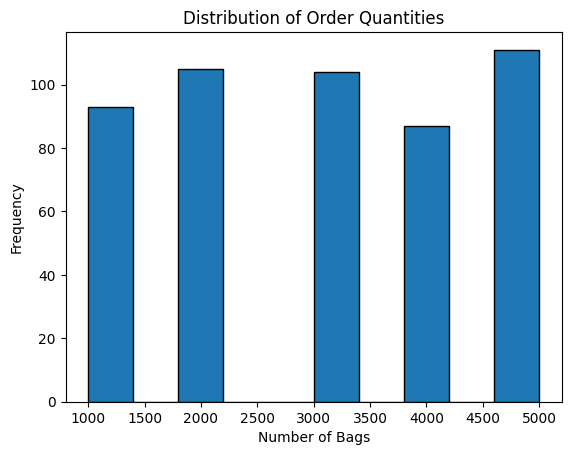

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['No of Bags'], bins=10, edgecolor='black')
plt.title("Distribution of Order Quantities")
plt.xlabel("Number of Bags")
plt.ylabel("Frequency")
plt.show()


In [ ]:
client_type_stats = df.groupby('Client Type')['No of Bags'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).reset_index()

client_type_stats['skewness'] = df.groupby('Client Type')['No of Bags'].apply(skew).values

print("Descriptive Statistics by Client Type:")
display(client_type_stats)


Descriptive Statistics by Client Type:


,Client Type,count,mean,median,std,min,max,skewness
0,Business,250,"3,124.00","3,000.00","1,443.94",1000,5000,-0.06
1,Individual,250,"2,948.00","3,000.00","1,394.66",1000,5000,0.08


In [ ]:
location_stats = df.groupby('Location')['No of Bags'].agg(
    ['count', 'mean', 'median', 'std', 'min', 'max']
).reset_index()
location_stats['skewness'] = df.groupby('Location')['No of Bags'].apply(skew).values

print("Descriptive Statistics by Location:")
display(location_stats)


Descriptive Statistics by Location:


,Location,count,mean,median,std,min,max,skewness
0,Coimbatore,71,"3,154.93","3,000.00","1,420.74",1000,5000,-0.06
1,Madurai,393,"3,020.36","3,000.00","1,428.43",1000,5000,0.02
2,Theni,36,"2,972.22","3,000.00","1,362.48",1000,5000,0.05


## EndTerm Submission

In [ ]:
df = pd.read_excel("Orders.xlsx", sheet_name='Cleaned Orders')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.where(y_true == 0, np.nan, y_true)
    return np.nanmean(np.abs((y_true - y_pred) / denom)) * 100

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [ ]:
df.columns = [c.strip().lower() for c in df.columns]

col_date = [c for c in df.columns if 'date' in c][0]
col_bags = [c for c in df.columns if ('no' in c and 'bag' in c) or 'qty' in c][0]

df[col_date] = pd.to_datetime(df[col_date])
monthly = (df.set_index(col_date)
             .resample('MS')[col_bags]
             .sum()
             .asfreq('MS')
             .fillna(0))

monthly_df = monthly.reset_index().rename(columns={col_date: 'Month', col_bags: 'Bags'})
monthly_df['MonthIndex'] = np.arange(len(monthly_df))

In [ ]:
X = monthly_df[['MonthIndex']].values
y = monthly_df['Bags'].values

lin = LinearRegression().fit(X, y)
yhat_lin = lin.predict(X)

mae_lin = mean_absolute_error(y, yhat_lin)
rmse_lin = np.sqrt(mean_squared_error(y, yhat_lin))
mape_lin = mape(y, yhat_lin)

print("=== Linear Regression (Trend) ===")
print(f"MAE : {mae_lin:,.2f}")
print(f"RMSE: {rmse_lin:,.2f}")
print(f"MAPE: {mape_lin:,.2f}%")

=== Linear Regression (Trend) ===
MAE : 8,925.81
RMSE: 12,426.96
MAPE: 50.40%


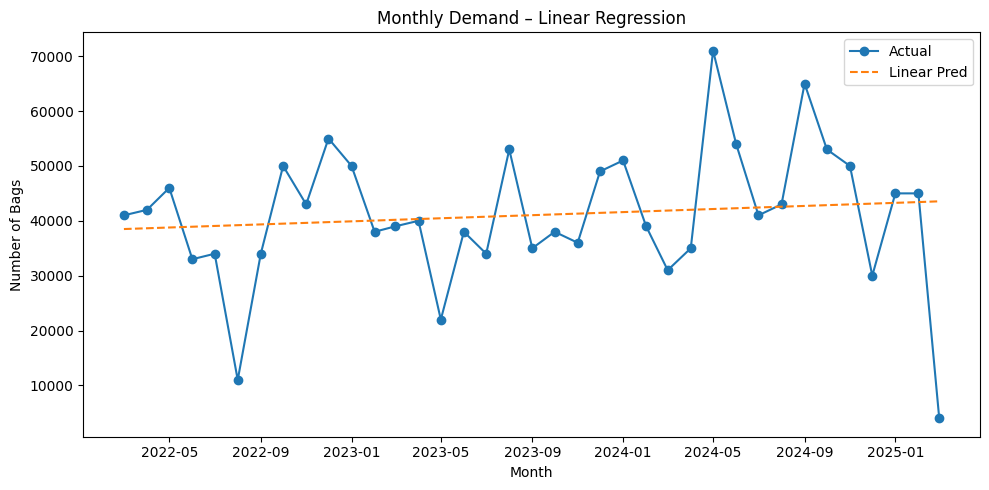

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_df['Month'], y, marker='o', label='Actual')
plt.plot(monthly_df['Month'], yhat_lin, linestyle='--', label='Linear Pred')
plt.title('Monthly Demand – Linear Regression')
plt.xlabel('Month'); plt.ylabel('Number of Bags'); plt.legend(); plt.tight_layout()
plt.show()


In [ ]:
results = []
max_deg = 18
for deg in range(1, max_deg + 1):
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    mae  = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    mape_val = mape(y, y_pred)

    results.append((deg, mae, rmse, mape_val))

res_df = pd.DataFrame(results, columns=['Degree','MAE','RMSE','MAPE'])
print("\n=== Polynomial Degree Sweep ===")
res_df


=== Polynomial Degree Sweep ===


,Degree,MAE,RMSE,MAPE
0,1,"8,925.81","12,426.96",50.40
1,2,"9,499.59","12,257.75",49.22
2,3,"9,265.11","11,506.34",42.51
3,4,"8,923.57","10,885.65",37.52
4,5,"7,999.15","10,240.82",29.53
5,6,"7,969.06","10,219.78",30.19
6,7,"7,788.75","10,111.93",28.21
7,8,"7,426.92","9,868.47",24.88
8,9,"7,401.76","9,793.01",25.62
9,10,"7,855.42","10,160.27",26.92


## We will select deg as 7 as it is low and does not overfit

In [ ]:
best_deg = 7
poly_best = PolynomialFeatures(degree=best_deg)
X_poly_best = poly_best.fit_transform(X)
model_best = LinearRegression().fit(X_poly_best, y)
yhat_best = model_best.predict(X_poly_best)

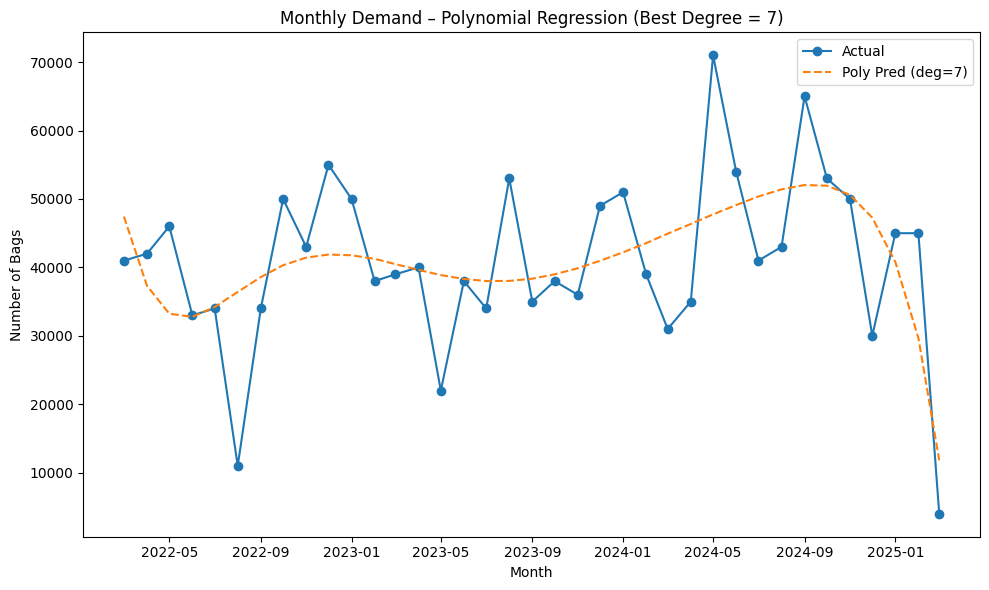

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(monthly_df['Month'], y, marker='o', label='Actual')
plt.plot(monthly_df['Month'], yhat_best, linestyle='--', label=f'Poly Pred (deg={best_deg})')
plt.title(f'Monthly Demand – Polynomial Regression (Best Degree = {best_deg})')
plt.xlabel('Month'); plt.ylabel('Number of Bags'); plt.legend(); plt.tight_layout()
plt.show()

In [ ]:
best_row = res_df.iloc[res_df['MAPE'].idxmin()]
summary = pd.DataFrame({
    'Model' : ['Linear', f'Polynomial (deg={best_deg})'],
    'MAE'   : [mae_lin, best_row['MAE']],
    'RMSE'  : [rmse_lin, best_row['RMSE']],
    'MAPE%' : [mape_lin, best_row['MAPE']]
})
print("\n=== Forecast Metrics Summary ===")
print(summary)


=== Forecast Metrics Summary ===
                Model      MAE      RMSE  MAPE%
0              Linear 8,925.81 12,426.96  50.40
1  Polynomial (deg=7) 7,470.90  9,762.52  23.01


## Problem 3.2 — High-Value Customer Identification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel("Orders.xlsx", sheet_name='Cleaned Orders')
df.columns = [c.strip().lower() for c in df.columns]

col_client = [c for c in df.columns if 'client' in c or 'customer' in c][0]
col_bags = [c for c in df.columns if ('no' in c and 'bag' in c) or 'qty' in c][0]

client_summary = df.groupby(col_client)[col_bags].agg(['count', 'sum', 'mean']).reset_index()
client_summary.columns = ['Client', 'OrderFrequency', 'TotalBags', 'AvgOrderSize']

print("Aggregated client data:")
print(client_summary.head())


Aggregated client data:
    Client  OrderFrequency  TotalBags  AvgOrderSize
0  C000001              43     134000      3,116.28
1  C000002              36     107000      2,972.22
2  C000003              21      72000      3,428.57
3  C000004              30      88000      2,933.33
4  C000005              28      90000      3,214.29


In [ ]:
mean_val = client_summary['TotalBags'].mean()
std_val = client_summary['TotalBags'].std()

def classify(x):
    if x > mean_val + std_val:
        return 'High-Value'
    elif x < mean_val - std_val:
        return 'Low-Value'
    else:
        return 'Medium-Value'

client_summary['Segment'] = client_summary['TotalBags'].apply(classify)

seg_counts = client_summary['Segment'].value_counts()
seg_share = client_summary.groupby('Segment')['TotalBags'].sum() / client_summary['TotalBags'].sum() * 100

print("\n=== Customer Segmentation Summary ===")
print(seg_counts)
print("\n=== Segment Revenue Share (%) ===")
print(seg_share)



=== Customer Segmentation Summary ===
Segment
Medium-Value    26
High-Value       6
Name: count, dtype: int64

=== Segment Revenue Share (%) ===
Segment
High-Value     42.36
Medium-Value   57.64
Name: TotalBags, dtype: float64


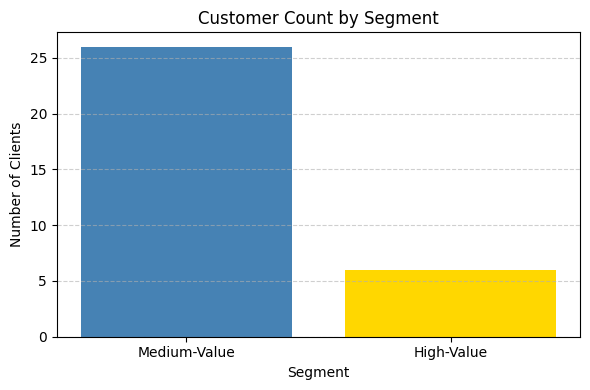

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(seg_counts.index, seg_counts.values, color=['steelblue', 'gold', 'darkorange'])
plt.title('Customer Count by Segment')
plt.xlabel('Segment'); plt.ylabel('Number of Clients')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

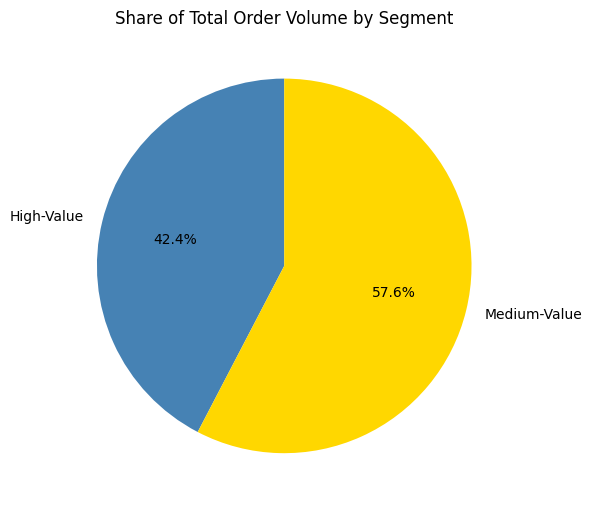

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(seg_share, labels=seg_share.index, autopct='%1.1f%%', startangle=90,
        colors=['steelblue', 'gold', 'darkorange'])
plt.title('Share of Total Order Volume by Segment')
plt.tight_layout()
plt.show()


## Problem 3.3 — Regional Demand Analysis

In [ ]:
df = pd.read_excel("Orders.xlsx", sheet_name='Cleaned Orders')
df.columns = [c.strip().lower() for c in df.columns]

col_loc = [c for c in df.columns if 'location' in c or 'region' in c or 'city' in c][0]
col_bags = [c for c in df.columns if ('no' in c and 'bag' in c) or 'qty' in c][0]

print(f"Using columns: Location → {col_loc}, Bags → {col_bags}")

Using columns: Location → location, Bags → no of bags


In [ ]:
region_summary = (
    df.groupby(col_loc)[col_bags]
      .agg(['count', 'sum', 'mean', 'std'])
      .reset_index()
      .rename(columns={'count': 'OrderCount', 'sum': 'TotalBags', 'mean': 'AvgOrder', 'std': 'StdDev'})
      .sort_values('TotalBags', ascending=False)
)

print("Regional Summary:")
print(region_summary)

Regional Summary:
     location  OrderCount  TotalBags  AvgOrder   StdDev
1     Madurai         393    1187000  3,020.36 1,428.43
0  Coimbatore          71     224000  3,154.93 1,420.74
2       Theni          36     107000  2,972.22 1,362.48


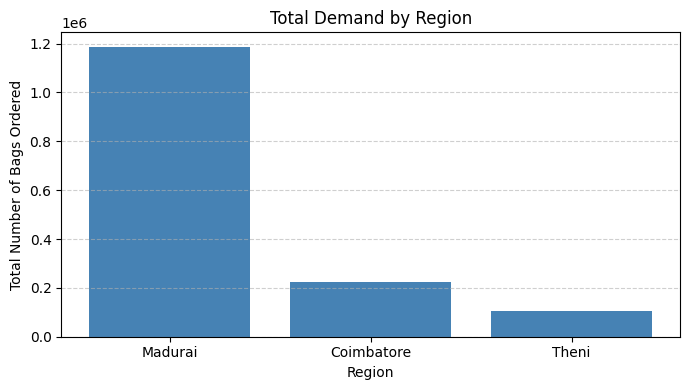

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(region_summary[col_loc], region_summary['TotalBags'], color='steelblue')
plt.title('Total Demand by Region')
plt.xlabel('Region')
plt.ylabel('Total Number of Bags Ordered')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


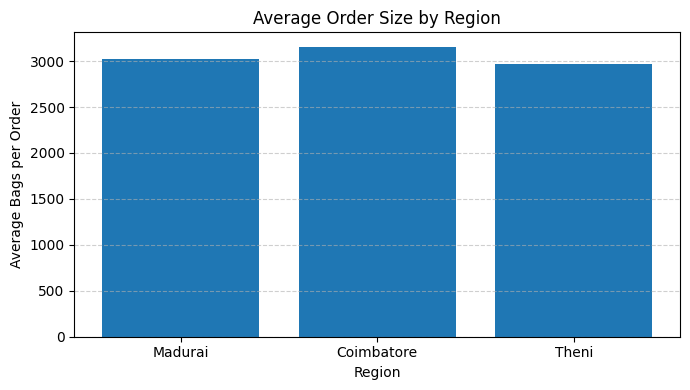

In [ ]:
plt.figure(figsize=(7,4))
plt.bar(region_summary[col_loc], region_summary['AvgOrder'])
plt.title('Average Order Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Bags per Order')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

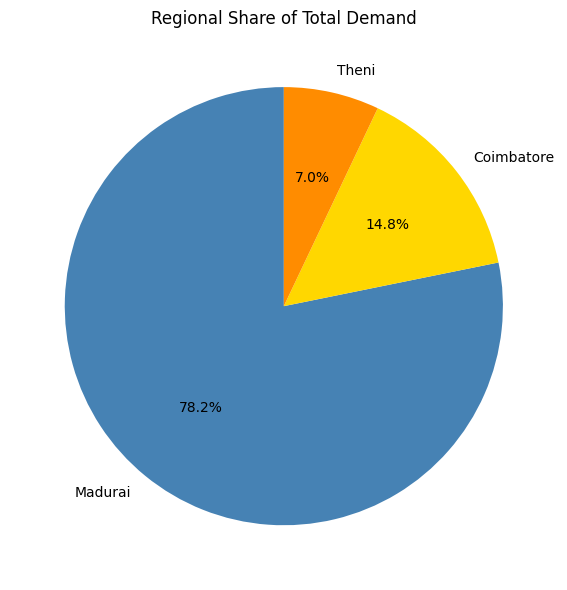

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(region_summary['TotalBags'],
        labels=region_summary[col_loc],
        autopct='%1.1f%%', startangle=90, colors=['steelblue', 'gold', 'darkorange'])
plt.title('Regional Share of Total Demand')
plt.tight_layout()
plt.show()


## Trying ARIMA for Forecasting for problem 3.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


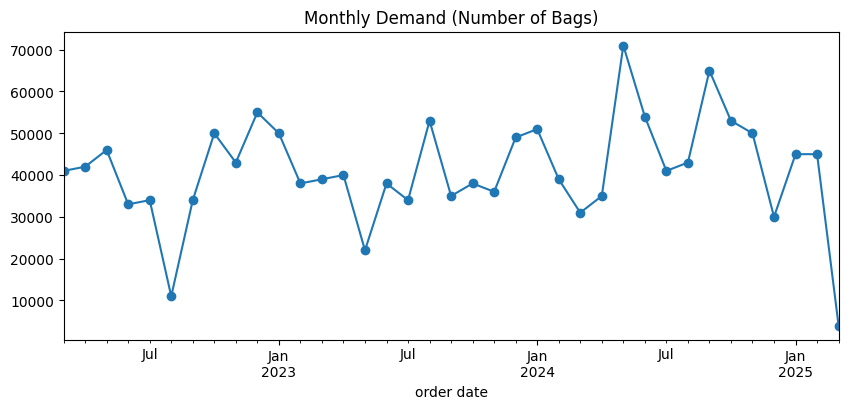

In [ ]:
col_date = [c for c in df.columns if 'date' in c][0]
col_bags = [c for c in df.columns if ('no' in c and 'bag' in c) or 'qty' in c][0]

df[col_date] = pd.to_datetime(df[col_date])
monthly = (df.set_index(col_date)
             .resample('MS')[col_bags]
             .sum()
             .asfreq('MS')
             .fillna(0))

monthly.plot(figsize=(10,4), marker='o', title='Monthly Demand (Number of Bags)')
plt.show()

In [ ]:
H = 6
train, test = monthly.iloc[:-H], monthly.iloc[-H:]
print(f"Train: {len(train)}, Test: {len(test)}")

Train: 31, Test: 6


In [ ]:
def evaluate_arima(order):
    try:
        model = ARIMA(train, order=order)
        res = model.fit()
        fc = res.forecast(steps=len(test))
        mae = mean_absolute_error(test, fc)
        rmse = np.sqrt(mean_squared_error(test, fc))
        mape = np.mean(np.abs((test - fc) / test.replace(0, np.nan))) * 100
        return (order, res.aic, mae, rmse, mape)
    except Exception as e:
        print(f"Failed for ARIMA{order}: {e}")
        return None


In [ ]:
orders = [(p,1,q) for p in range(0,3) for q in range(0,3)]  # test 0–2 for p,q
results = []

for order in orders:
    out = evaluate_arima(order)
    if out:
        results.append(out)

res_df = pd.DataFrame(results, columns=['Order','AIC','MAE','RMSE','MAPE'])
print(res_df.sort_values('AIC').reset_index(drop=True))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


       Order    AIC       MAE      RMSE   MAPE
0  (0, 1, 2) 655.78 12,212.06 20,016.09 200.98
1  (1, 1, 1) 656.04 11,898.44 19,919.45 199.37
2  (0, 1, 1) 656.06 12,971.02 20,377.16 204.60
3  (2, 1, 1) 657.10 12,705.53 20,180.17 204.12
4  (2, 1, 2) 657.24 16,551.07 23,705.09 238.11
5  (1, 1, 2) 657.72 12,147.90 19,960.16 200.42
6  (0, 1, 0) 659.54 27,166.67 31,924.39 297.20
7  (1, 1, 0) 659.93 23,277.65 28,745.29 273.89
8  (2, 1, 0) 660.78 20,116.09 26,237.58 254.34


In [ ]:
best_order = res_df.loc[res_df['AIC'].idxmin(), 'Order']
print(f"Best ARIMA order: {best_order}")

best_model = ARIMA(train, order=best_order).fit()
print(best_model.summary())


Best ARIMA order: (0, 1, 2)
                               SARIMAX Results                                
Dep. Variable:             no of bags   No. Observations:                   31
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -324.888
Date:                Mon, 03 Nov 2025   AIC                            655.777
Time:                        17:02:37   BIC                            659.981
Sample:                    03-01-2022   HQIC                           657.122
                         - 09-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5615      0.294     -1.911      0.056      -1.137       0.014
ma.L2         -0.2294      0.242     -0.949      0.343      -0.703       0.244
sigma2      1.557e+08   

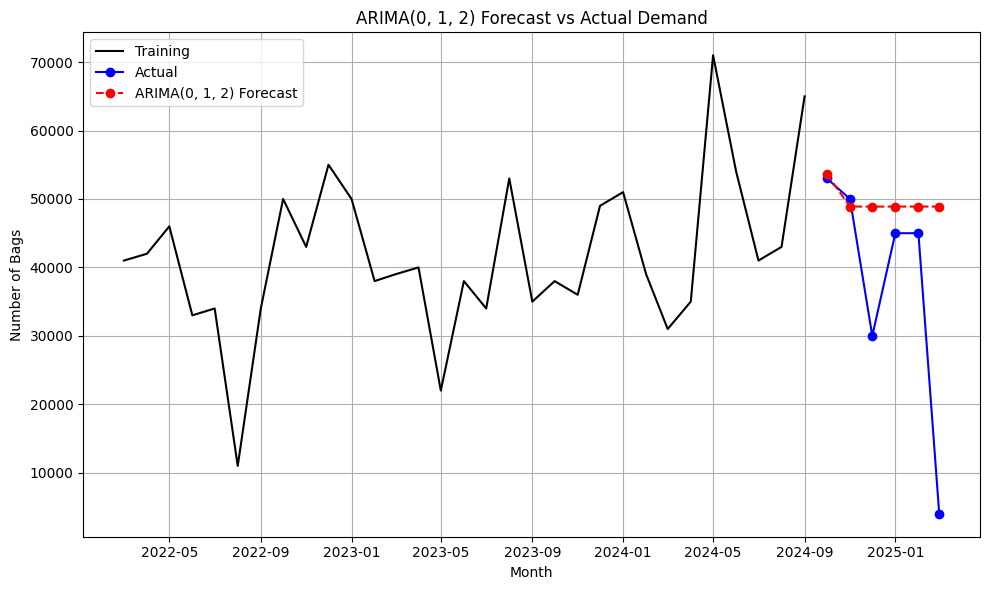

In [ ]:
forecast = best_model.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Training', color='black')
plt.plot(test.index, test, marker='o', label='Actual', color='blue')
plt.plot(forecast.index, forecast, marker='o', linestyle='--', color='red', label=f'ARIMA{best_order} Forecast')
plt.title(f'ARIMA{best_order} Forecast vs Actual Demand')
plt.xlabel('Month'); plt.ylabel('Number of Bags')
plt.legend(); plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
mape = np.mean(np.abs((test - forecast) / test.replace(0, np.nan))) * 100

print(f"\nFinal ARIMA{best_order} Performance:")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")



Final ARIMA(0, 1, 2) Performance:
MAE : 12212.06
RMSE: 20016.09
MAPE: 200.98%


## ARIMA is underperforming so we stick with polynomial regression

Monthly Demand Deviation Plot (Actual – Predicted)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

df.columns = [c.strip().lower() for c in df.columns]
col_date = [c for c in df.columns if 'date' in c][0]
col_bags = [c for c in df.columns if ('no' in c and 'bag' in c) or 'qty' in c][0]

df[col_date] = pd.to_datetime(df[col_date])
monthly = (df.set_index(col_date)
             .resample('MS')[col_bags].sum()
             .asfreq('MS').fillna(0))

monthly_df = monthly.reset_index().rename(columns={col_date:'Month', col_bags:'Bags'})
monthly_df['MonthIndex'] = np.arange(len(monthly_df))

def mape(y_true, y_pred):
    y_true = np.asarray(y_true, float); y_pred = np.asarray(y_pred, float)
    return np.nanmean(np.abs((y_true - y_pred) / np.where(y_true==0, np.nan, y_true))) * 100

X = monthly_df[['MonthIndex']].values
y = monthly_df['Bags'].values

lin = LinearRegression().fit(X, y)
yhat_lin = lin.predict(X)

poly = PolynomialFeatures(degree=7)
X7 = poly.fit_transform(X)
model7 = LinearRegression().fit(X7, y)
yhat7 = model7.predict(X7)

mae_lin  = mean_absolute_error(y, yhat_lin);  rmse_lin  = np.sqrt(mean_squared_error(y, yhat_lin));  mape_lin  = mape(y, yhat_lin)
mae_p7   = mean_absolute_error(y, yhat7);     rmse_p7   = np.sqrt(mean_squared_error(y, yhat7));     mape_p7   = mape(y, yhat7)

mae_lin, rmse_lin, mape_lin, mae_p7, rmse_p7, mape_p7


(8925.813437904477,
 np.float64(12426.959852691167),
 np.float64(50.39743612629037),
 7788.753331560187,
 np.float64(10111.934831362983),
 np.float64(28.212663654816357))

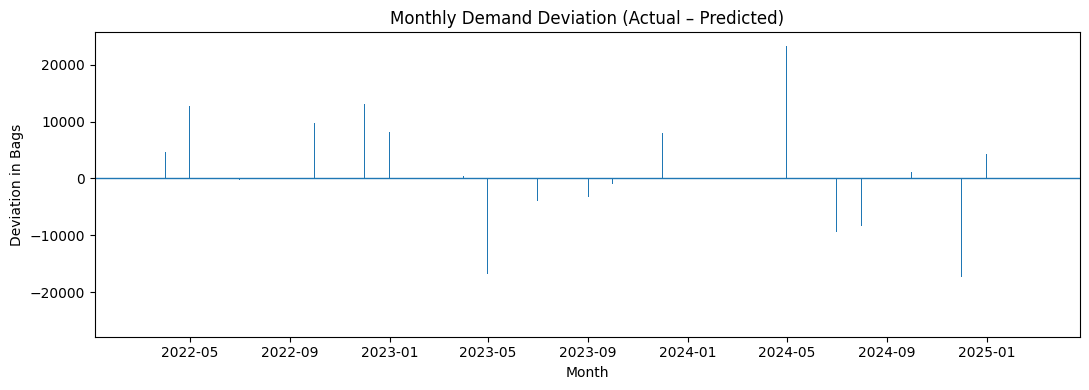

In [ ]:
dev = monthly_df.copy()
dev['Predicted'] = yhat7
dev['Deviation'] = dev['Bags'] - dev['Predicted']

plt.figure(figsize=(11,4))
plt.bar(dev['Month'], dev['Deviation'])
plt.axhline(0, linewidth=1)
plt.title('Monthly Demand Deviation (Actual – Predicted)')
plt.xlabel('Month'); plt.ylabel('Deviation in Bags')
plt.tight_layout()

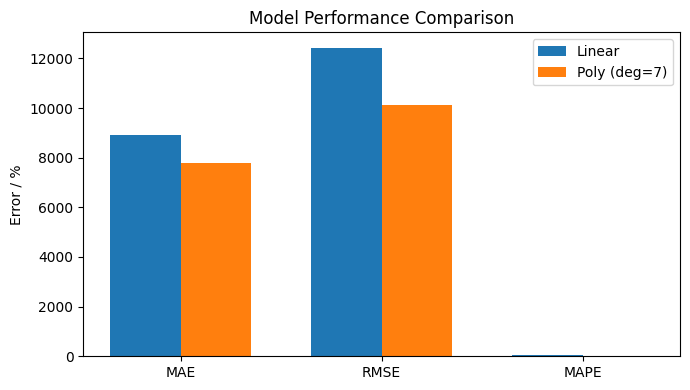

In [ ]:
labels = ['MAE','RMSE','MAPE']
linear_vals = [mae_lin, rmse_lin, mape_lin]
poly7_vals  = [mae_p7,  rmse_p7,  mape_p7]

x = np.arange(len(labels)); w = 0.35
plt.figure(figsize=(7,4))
plt.bar(x - w/2, linear_vals, width=w, label='Linear')
plt.bar(x + w/2, poly7_vals,  width=w, label='Poly (deg=7)')
plt.xticks(x, labels)
plt.title('Model Performance Comparison')
plt.ylabel('Error / %')
plt.legend()
plt.tight_layout()

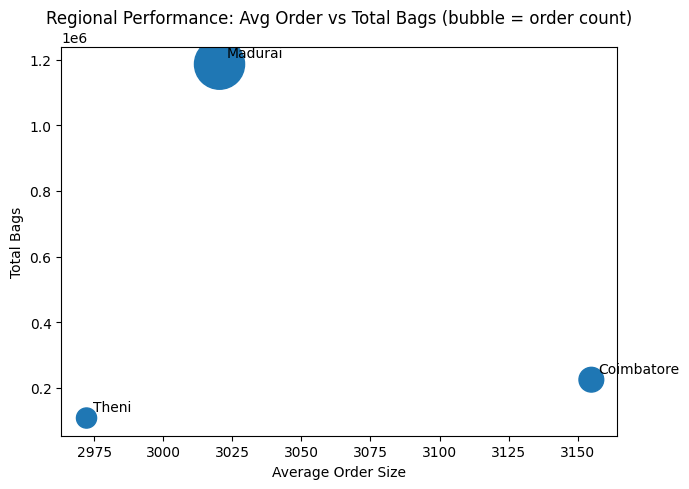

In [ ]:
col_loc = [c for c in df.columns if 'location' in c or 'region' in c or 'city' in c][0]
region = (df.groupby(col_loc)[col_bags]
            .agg(['count','sum','mean']).reset_index()
            .rename(columns={'count':'OrderCount','sum':'TotalBags','mean':'AvgOrder'}))

plt.figure(figsize=(7,5))
sizes = (region['OrderCount'] / region['OrderCount'].max()) * 1200 + 100
plt.scatter(region['AvgOrder'], region['TotalBags'], s=sizes)

for _, r in region.iterrows():
    plt.annotate(r[col_loc], (r['AvgOrder'], r['TotalBags']), xytext=(5,5), textcoords='offset points')

plt.title('Regional Performance: Avg Order vs Total Bags (bubble = order count)')
plt.xlabel('Average Order Size'); plt.ylabel('Total Bags')
plt.tight_layout()
